# Non-Linear_Regression

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [19]:
df = pd.read_csv('db.csv')
df.head(10)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
5,70,2,True,True,False,North Program Organization,2.050000e+09,68333.33
6,87,2,True,True,True,Pardis,6.000000e+08,20000.00
7,59,1,True,True,True,Shahran,2.150000e+09,71666.67
8,54,2,True,True,False,Andisheh,4.930000e+08,16433.33
9,71,1,True,True,True,West Ferdows Boulevard,2.370000e+09,79000.00


In [20]:
df.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


In [21]:
df['Area'] = df['Area'].replace([' ',','],'',regex=True)

In [22]:
df= df.dropna(subset='Area')
df['Area'] = df['Area'].astype(float)

In [23]:
df = df[df['Area'] < 1000]

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Address'] = le.fit_transform(df['Address'])
# df['Address'] = pd.to_numeric(df['Address'], errors='coerce')
df['Parking'] = df['Parking'].astype(int)

df['Warehouse'] = df['Warehouse'].astype(int)
# df['Warehouse'] = le.fit_transform(df['Warehouse'])

df['Elevator'] = df['Elevator'].astype(int)

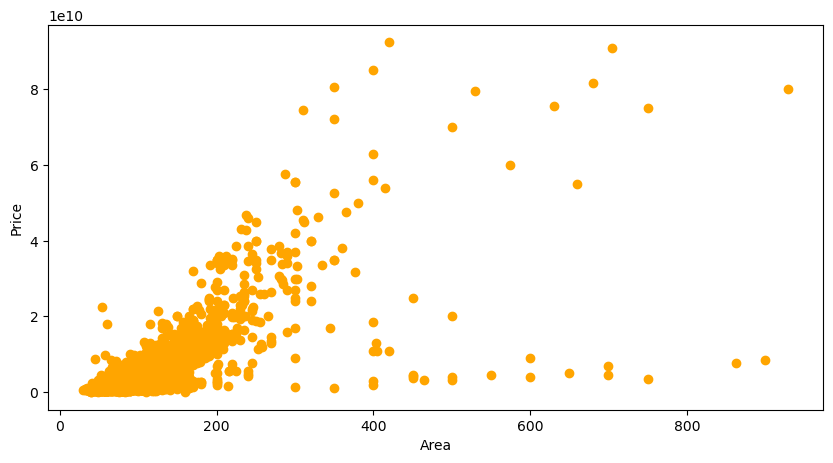

In [25]:
plt.figure(figsize=(10,5))
x_data , y_data = (df['Area'].values , df['Price'].values)
x_data.astype(int)
plt.scatter(x_data , y_data , color='orange')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

In [26]:
df.dtypes

Area          float64
Room            int64
Parking         int32
Warehouse       int32
Elevator        int32
Address         int32
Price         float64
Price(USD)    float64
dtype: object

In [27]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['Area']])
train_y = np.asanyarray(train[['Price']])

test_x = np.asanyarray(test[['Area']])
test_y = np.asanyarray(test[['Price']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[1.0000e+00, 6.3000e+01, 3.9690e+03],
       [1.0000e+00, 7.9000e+01, 6.2410e+03],
       [1.0000e+00, 9.5000e+01, 9.0250e+03],
       ...,
       [1.0000e+00, 7.5000e+01, 5.6250e+03],
       [1.0000e+00, 1.0500e+02, 1.1025e+04],
       [1.0000e+00, 8.2000e+01, 6.7240e+03]])

In [29]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.00000000e+00  1.34263897e+08 -1.04135590e+05]]
Intercept:  [-7.34029864e+09]


Text(0, 0.5, 'Price')

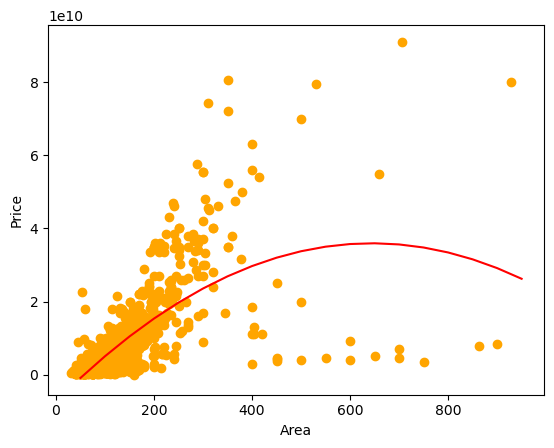

In [30]:
plt.scatter(train.Area, train.Price,  color='orange')
XX = np.arange(50, 1000.0, 50)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Area")
plt.ylabel("Price")

In [31]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_ ) )

Residual sum of squares (MSE): 36831309630042984448.00
R2-score: 0.56
